<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/Star_Formation_History/NGC6822_SFH_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 848, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 848 (delta 113), reused 42 (delta 42), pack-reused 665
Receiving objects: 100% (848/848), 71.87 MiB | 12.44 MiB/s, done.
Resolving deltas: 100% (393/393), done.
Updating files: 100% (96/96), done.


In [2]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

In [3]:
Z = 0.01
Z_name = ''.join(list(str(Z))[2:])

## Preparing data

In [4]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

In [5]:
file_address = '/content/NGC_6822/Data/final_data.csv'
df = pd.read_csv(file_address , index_col='Mid')
df = df.fillna(89.99)
df['Ks'] = df['Ks'] - Ak
df['J'] = df['J'] - Aj
df['J-Ks'] = df['J'] - df['Ks']
df.drop(df.columns[[4,5,6,8]], axis=1, inplace=True)

In [6]:
df

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks
Mid,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340
...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108


In [7]:
df_Whitelock = pd.read_csv('/content/NGC_6822/Data/Whitelock.csv')
df_Whitelock

,Seq( ),RAJ2000(deg),DEJ2000(deg),M( ),Jmag(mag),e_Jmag(mag),o_Jmag( ),Hmag(mag),e_Hmag(mag),o_Hmag( ),Ksmag(mag),e_Ksmag(mag),o_Ksmag( ),J-H(mag),H-Ks(mag),J-Ks(mag),recno()
0,30370.0,296.17061,-14.95234,,17.588,0.087,7.0,17.170,0.044,10.0,17.138,0.078,9.0,0.418,0.032,0.450,1.0
1,31395.0,296.17062,-14.96028,,18.749,0.136,14.0,17.952,0.057,14.0,17.686,0.069,12.0,0.797,0.266,1.063,2.0
2,30746.0,296.17076,-14.97089,,17.537,0.033,13.0,17.091,0.040,14.0,17.061,0.078,14.0,0.446,0.030,0.476,3.0
3,31721.0,296.17082,-14.88634,,18.644,0.072,11.0,17.683,0.047,12.0,17.429,0.085,12.0,0.961,0.254,1.215,4.0
4,30982.0,296.17091,-14.89924,,17.498,0.021,11.0,17.000,0.049,15.0,16.867,0.057,13.0,0.498,0.133,0.631,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,21898.0,296.30447,-14.65989,,18.322,0.082,5.0,17.810,0.089,4.0,17.493,0.198,4.0,0.512,0.317,0.829,6253.0
6253,40643.0,296.30451,-14.75199,,16.742,0.011,6.0,16.021,0.083,8.0,15.823,0.099,6.0,0.721,0.198,0.919,6254.0
6254,10482.0,296.30455,-14.77980,,16.202,0.017,3.0,15.658,0.413,5.0,15.564,0.019,3.0,0.544,0.094,0.638,6255.0
6255,12680.0,296.30462,-14.76793,,17.940,0.010,3.0,16.843,0.371,5.0,16.656,0.012,2.0,1.097,0.187,1.284,6256.0


In [8]:
X = (df['J-Ks'])
Y = (df['Ks'])

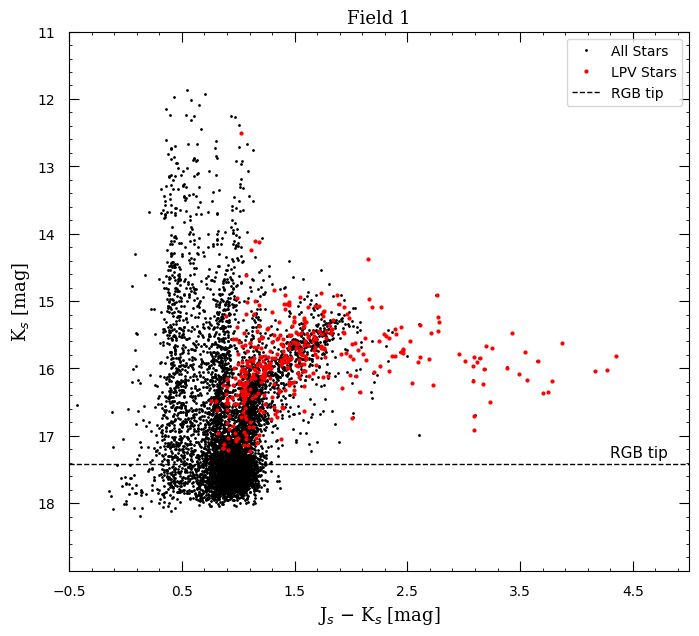

In [9]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5 , -0.5
ymax , ymin = 19  , 11 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot((df_Whitelock['Jmag(mag)']-Aj) - (df_Whitelock['Ksmag(mag)']-Ak), (df_Whitelock['Ksmag(mag)']-Ak) ,'k.', markersize = '2', label = 'All Stars')
plt.plot(X, Y,'r.', markersize = '4', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Adding Isochrones

In [10]:
!pip install git+https://github.com/Mahdi-Abdollahii/AstroDC.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Mahdi-Abdollahii/AstroDC.git to /tmp/pip-req-build-5drs3_fr
  Running command git clone --filter=blob:none --quiet https://github.com/Mahdi-Abdollahii/AstroDC.git /tmp/pip-req-build-5drs3_fr
  Resolved https://github.com/Mahdi-Abdollahii/AstroDC.git to commit 115ab394c759b876f88a319ffcec42f325ffb669
  Preparing metadata (setup.py) ... done
  Created wheel for AstroDC: filename=AstroDC-1.0.4-py3-none-any.whl size=2573 sha256=f382b21e4dab7c31a56656666e7be165eb76205e9ca76f124d1661a5cb153d81
  Stored in directory: /tmp/pip-ephem-wheel-cache-0f83beom/wheels/22/e9/d8/3e2ea76c885e9414f4915871d51adccd8aa853a81eaa9f492d
Successfully built AstroDC


In [11]:
from AstroDC import AstroDC

In [12]:
AstroDC.Stev_Isochrone_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_01.dat','ISO_01')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Wed Jan 25 23:38:44 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [13]:
AstroDC.Stev_Isochrone_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_1.dat','ISO_1')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 11:57:57 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [14]:
ISO_df_01= pd.read_csv("ISO_01.csv")
ISO_df_01['logAge'] = round(ISO_df_01['logAge'], 3)
ISO_df_01 = ISO_df_01[ISO_df_01['Kmag'] < 30]
ISO_df_01

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.01,-0.17553,6.6,0.090000,1.081690,0.090,-1.585,3.4321,3.658,0,...,0.0100,8.733,15.392,14.740,13.448,11.542,9.309,6.926,6.279,5.913
1,0.01,-0.17553,6.6,0.091297,1.093999,0.091,-1.582,3.4325,3.663,0,...,0.0100,8.726,15.402,14.727,13.424,11.523,9.294,6.920,6.273,5.907
2,0.01,-0.17553,6.6,0.100000,1.171106,0.100,-1.565,3.4348,3.694,0,...,0.0100,8.683,15.490,14.660,13.278,11.411,9.205,6.883,6.240,5.876
3,0.01,-0.17553,6.6,0.109283,1.244281,0.109,-1.527,3.4394,3.713,0,...,0.0100,8.587,15.545,14.518,13.049,11.221,9.042,6.795,6.150,5.798
4,0.01,-0.17553,6.6,0.120116,1.320078,0.120,-1.505,3.4423,3.744,0,...,0.0100,8.534,15.693,14.457,12.894,11.095,8.934,6.749,6.104,5.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,0.01,-0.17553,10.1,0.935629,2.458367,0.691,3.302,3.5091,-0.036,7,...,0.0112,-3.486,4.272,2.952,1.333,-0.616,-2.739,-5.087,-6.122,-6.482
20655,0.01,-0.17553,10.1,0.935630,2.458368,0.683,3.335,3.5055,-0.089,7,...,0.0112,-3.568,4.274,3.075,1.495,-0.545,-2.723,-5.182,-6.218,-6.586
20656,0.01,-0.17553,10.1,0.935630,2.458368,0.672,3.361,3.5040,-0.127,7,...,0.0112,-3.632,4.263,3.111,1.543,-0.539,-2.744,-5.251,-6.287,-6.660
20657,0.01,-0.17553,10.1,0.935630,2.458368,0.664,3.368,3.5058,-0.133,7,...,0.0112,-3.650,4.237,3.019,1.423,-0.624,-2.806,-5.263,-6.298,-6.668


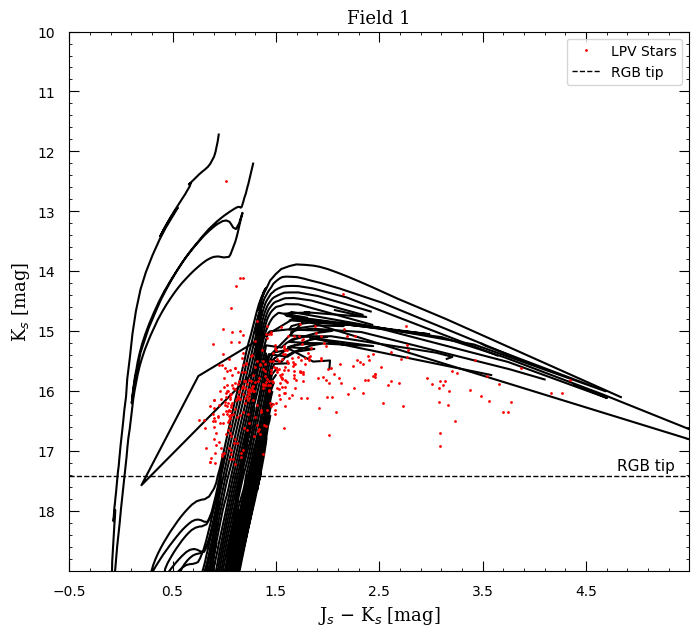

In [15]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [6.8,7,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

In [16]:
ISO_df_1= pd.read_csv("ISO_1.csv")
ISO_df_1['logAge'] = round(ISO_df_1['logAge'], 3)
ISO_df_1 = ISO_df_1[ISO_df_1['Kmag'] < 30]
ISO_df_1

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.01,-0.17553,6.60,0.090000,1.081690,0.090,-1.585,3.4321,3.658,0,...,0.010000,8.733,15.392,14.740,13.448,11.542,9.309,6.926,6.279,5.913
1,0.01,-0.17553,6.60,0.091297,1.093999,0.091,-1.582,3.4325,3.663,0,...,0.010000,8.726,15.402,14.727,13.424,11.523,9.294,6.920,6.273,5.907
2,0.01,-0.17553,6.60,0.100000,1.171106,0.100,-1.565,3.4348,3.694,0,...,0.010000,8.683,15.490,14.660,13.278,11.411,9.205,6.883,6.240,5.876
3,0.01,-0.17553,6.60,0.109283,1.244281,0.109,-1.527,3.4394,3.713,0,...,0.010000,8.587,15.545,14.518,13.049,11.221,9.042,6.795,6.150,5.798
4,0.01,-0.17553,6.60,0.120116,1.320078,0.120,-1.505,3.4423,3.744,0,...,0.010000,8.534,15.693,14.457,12.894,11.095,8.934,6.749,6.104,5.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21222,0.01,-0.17553,10.05,0.966879,2.465708,0.692,3.414,3.4894,-0.226,8,...,0.009833,-3.765,4.332,3.594,2.148,-0.188,-2.525,-5.433,-6.476,-6.867
21223,0.01,-0.17553,10.05,0.966879,2.465708,0.683,3.084,3.5384,0.294,8,...,0.009833,-2.939,4.190,2.148,0.296,-1.121,-2.716,-4.444,-5.450,-5.757
21224,0.01,-0.17553,10.05,0.966880,2.465708,0.657,3.429,3.4896,-0.263,8,...,0.009833,-3.802,4.341,3.595,2.138,-0.210,-2.552,-5.468,-6.510,-6.904
21225,0.01,-0.17553,10.05,0.966881,2.465709,0.648,3.101,3.5382,0.254,8,...,0.009833,-2.981,4.188,2.131,0.269,-1.155,-2.755,-4.486,-5.491,-5.801


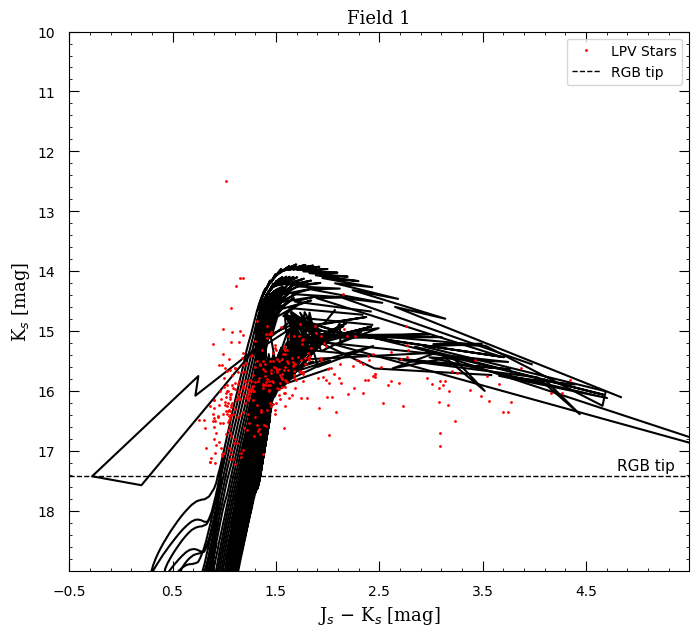

In [17]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Jmag'])  -  (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')


#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Data Correction

Selected years

In [ ]:
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]
LOG_AGE_C   = [8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7]
LOG_AGE_O   = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,9.8,9.9,10,10.1]

limitation lines

In [ ]:
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_peak_limit = (J_min) - ( K_min)

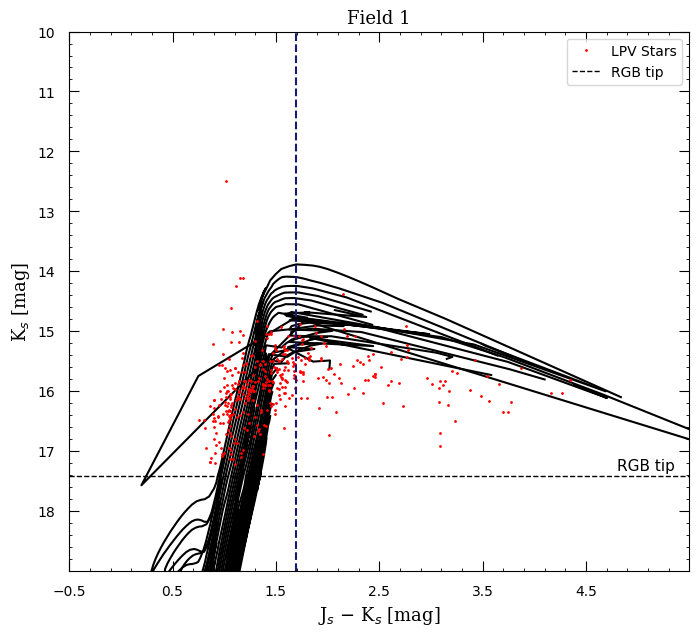

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

plt.legend(loc='upper right')
plt.savefig('CMD_peak_'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

Slope : Carbon

In [ ]:
df_Correction_C = ISO_df_01
df_Correction_C['J_K'] = df_Correction_C['Jmag'] - df_Correction_C['Kmag']
df_Correction_C = df_Correction_C[df_Correction_C['logAge'].isin(LOG_AGE_C)]
df_Correction_C = df_Correction_C[df_Correction_C['Kmag'] + DM  < RGBT ]
df_Correction_C = df_Correction_C[df_Correction_C['J_K'] > X_peak_limit].reset_index(drop=True)

In [ ]:
Slope_C = []
Slope_C_weight = []
for i in range(0,len(df_Correction_C)-1):
  Slope_C_prime = []
  Slope_C_weight_prime = []
  if df_Correction_C['logAge'][i+1] == df_Correction_C['logAge'][i] :
    K_diff = (df_Correction_C['Kmag'][i+1] - df_Correction_C['Kmag'][i])
    J_K_diff = df_Correction_C['J_K'][i+1] - df_Correction_C['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 :
        Slope_C_prime.append( K_diff / J_K_diff )
        Slope_C_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_C_weight_prime) > 0 : 
    Slope_C.append(sum((Slope_C_weight_prime / sum(Slope_C_weight_prime)) * Slope_C_prime))
    Slope_C_weight.append(sum(Slope_C_weight_prime))
Slope_C = sum((Slope_C_weight / sum(Slope_C_weight))*Slope_C)

Slope : Oxygen

In [ ]:
LOG_AGE_O_prime = LOG_AGE_O[0:3]

df_Correction_O = ISO_df_01
df_Correction_O['J_K'] = df_Correction_O['Jmag'] - df_Correction_O['Kmag']
df_Correction_O = df_Correction_O[df_Correction_O['logAge'].isin(LOG_AGE_O_prime)]
df_Correction_O = df_Correction_O[df_Correction_O['Kmag'] + DM  < RGBT ]
df_Correction_O = df_Correction_O[df_Correction_O['J_K'] > X_peak_limit].reset_index(drop=True)

In [ ]:
Slope_O = []
Slope_O_weight = []
for i in range(0,len(df_Correction_O)-1):
  Slope_O_prime = []
  Slope_O_weight_prime = []
  if df_Correction_O['logAge'][i+1] == df_Correction_O['logAge'][i] :
    K_diff = (df_Correction_O['Kmag'][i+1] - df_Correction_O['Kmag'][i])
    J_K_diff = df_Correction_O['J_K'][i+1] - df_Correction_O['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 : 
        Slope_O_prime.append( K_diff / J_K_diff )
        Slope_O_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_O_weight_prime) > 0 : 
    Slope_O.append(sum((Slope_O_weight_prime / sum(Slope_O_weight_prime)) * Slope_O_prime))
    Slope_O_weight.append(sum(Slope_O_weight_prime))
Slope_O = sum((Slope_O_weight / sum(Slope_O_weight))*Slope_O)

In [ ]:
print('Slope_C : ' + str(Slope_C))
print('Slope_O : ' + str(Slope_O))

Slope_C : 0.24966752992132735
Slope_O : 0.6711676648742084


Slope : Visualization

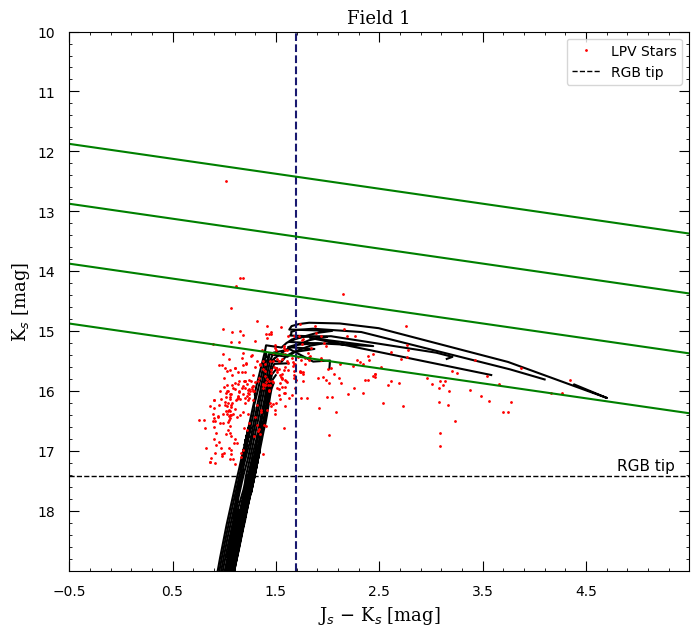

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

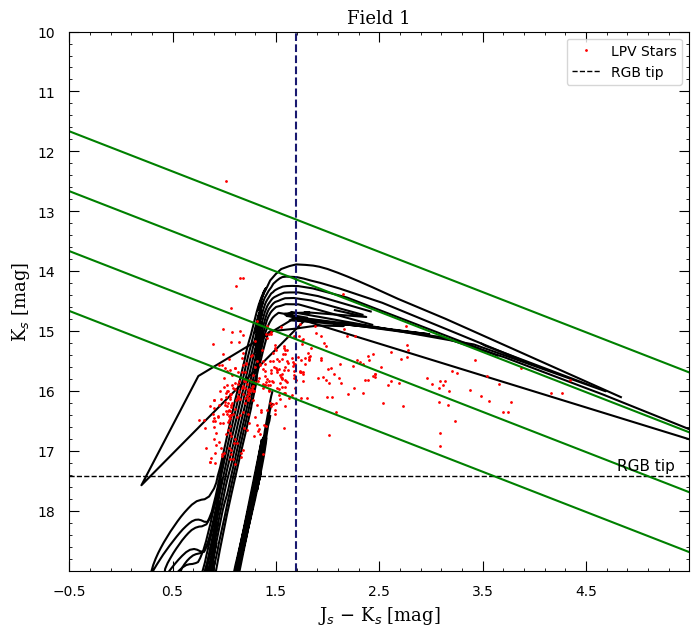

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_O
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = ( J_min - Aj )  -  ( K_min - Ak )
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slop lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_O * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

Calculation

In [ ]:
df_prime = df[(df['J-Ks']) > X_peak_limit]
df_prime['Ks_Corrected_C'] = (df_prime['Ks']) + (Slope_C * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['Ks_Corrected_O'] = (df_prime['Ks']) + (Slope_O * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['J-Ks_Corrected'] = X_peak_limit

In [ ]:
X_Corrected_C =  df_prime['J-Ks_Corrected']
Y_Corrected_C =  df_prime['Ks_Corrected_C']

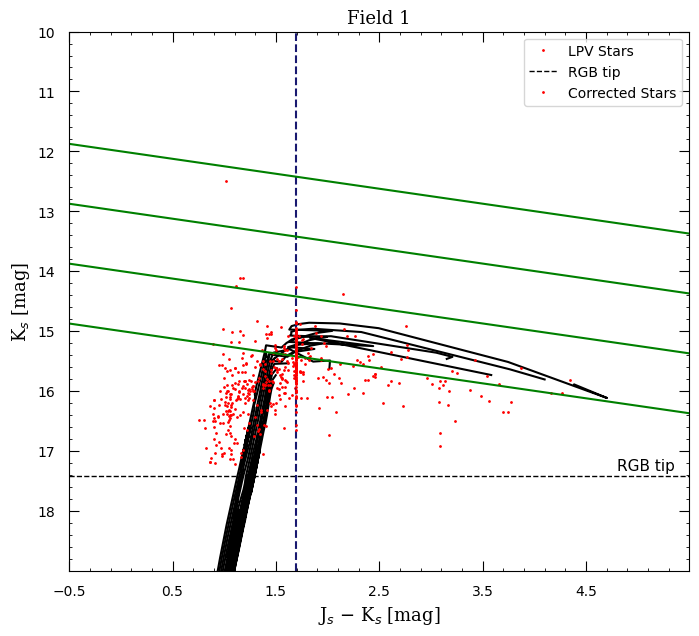

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

#Corrected Stars with carbon slope
plt.plot(X_Corrected_C, Y_Corrected_C,'r.', markersize = '2', label = 'Corrected Stars')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

In [ ]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[ Mag_Mass['Z'] == Z].reset_index(drop=True)

In [ ]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
0,0.01,-0.750,-7.390,NaN,-11.777
1,0.01,-0.402,-3.296,-11.777,-11.396
2,0.01,-0.173,-0.677,-11.396,-11.016
3,0.01,-0.301,-2.189,-11.016,-10.635
4,0.01,-0.217,-1.196,-10.635,-10.254
5,0.01,-0.583,-4.950,-10.254,-9.873
6,0.01,-0.305,-2.210,-9.873,-9.492
7,0.01,-0.309,-2.245,-9.492,-9.112
8,0.01,-0.410,-3.168,-9.112,-8.731
9,0.01,-0.292,-2.137,-8.731,-8.350


In [ ]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] : 
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [ ]:
a,b = Mag_Mass_a_b_Calculator(Mag_Mass, df_prime['Ks_Corrected_C'].loc[df_prime.index[10]] - DM )

In [ ]:
print(f'a: {a}   b: {b}')

a: -0.166   b: -1.17


$Log(M/M_s) = a \times K_s + b$

In [ ]:
O_index = []
C_index = []
for i in df_prime.index:
  Ks = df_prime['Ks_Corrected_C'].loc[i] - DM
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, Ks)
  M = 10 ** (a * Ks + b)
  if M > 1.1 and M < 4 :
    C_index.append(i)
  else :
    O_index.append(i)

In [ ]:
df_Corrected = df
for i in df_prime.index :
  print(i)
  df_Corrected.loc[i,'J-Ks'] = df_prime.loc[i,'J-Ks_Corrected']
  if i in C_index :
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_C']
    print('C Star --> ' + str(i) )
  else:
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_O']
    print('O Star --> ' + str(i) )

8
C Star --> 8
9
C Star --> 9
10
C Star --> 10
11
C Star --> 11
12
C Star --> 12
13
C Star --> 13
14
C Star --> 14
15
C Star --> 15
16
C Star --> 16
18
C Star --> 18
19
O Star --> 19
20
O Star --> 20
21
C Star --> 21
22
C Star --> 22
23
C Star --> 23
24
C Star --> 24
25
O Star --> 25
27
C Star --> 27
28
C Star --> 28
30
C Star --> 30
32
C Star --> 32
33
C Star --> 33
41
C Star --> 41
48
C Star --> 48
49
C Star --> 49
50
C Star --> 50
51
C Star --> 51
52
C Star --> 52
53
C Star --> 53
54
C Star --> 54
55
C Star --> 55
56
C Star --> 56
57
O Star --> 57
58
C Star --> 58
59
C Star --> 59
60
C Star --> 60
61
C Star --> 61
62
C Star --> 62
63
C Star --> 63
64
C Star --> 64
65
C Star --> 65
66
C Star --> 66
67
C Star --> 67
68
C Star --> 68
69
C Star --> 69
70
C Star --> 70
71
C Star --> 71
72
C Star --> 72
73
C Star --> 73
74
C Star --> 74
75
C Star --> 75
76
C Star --> 76
77
C Star --> 77
78
C Star --> 78
79
C Star --> 79
80
C Star --> 80
81
C Star --> 81
82
C Star --> 82
83
C Star --> 83
8

In [ ]:
df_Corrected

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks
Mid,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340
...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108


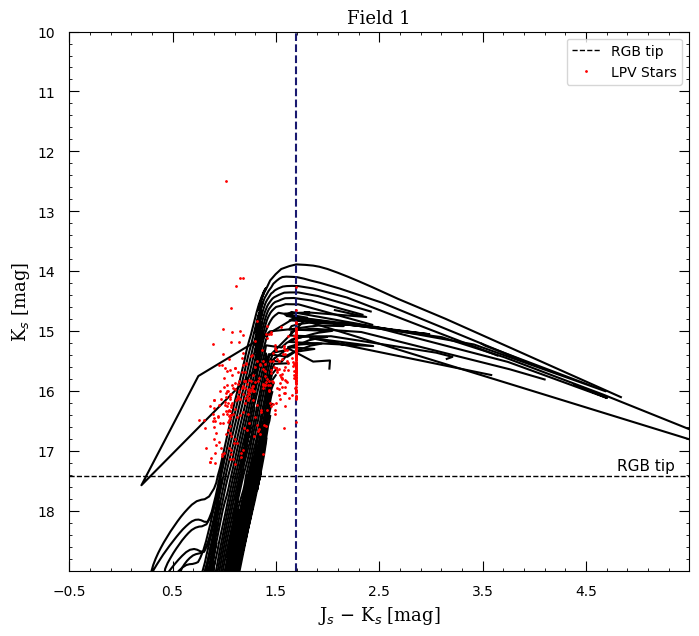

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#All stars
plt.plot(df_Corrected['J-Ks'], df_Corrected['Ks'],'r.', markersize = '2', label = 'LPV Stars')

plt.legend(loc='upper right')
plt.savefig('Data-Correction-'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

# Parameters Calculation

In [ ]:
df_final = df_Corrected
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks
Mid,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340
...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108


## Mag_Mass relation

$Log(M/M_s) = a \times K_s + b $

In [ ]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[Mag_Mass['Z'] == Z]

In [ ]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
182,0.01,-0.750,-7.390,NaN,-11.777
183,0.01,-0.402,-3.296,-11.777,-11.396
184,0.01,-0.173,-0.677,-11.396,-11.016
185,0.01,-0.301,-2.189,-11.016,-10.635
186,0.01,-0.217,-1.196,-10.635,-10.254
187,0.01,-0.583,-4.950,-10.254,-9.873
188,0.01,-0.305,-2.210,-9.873,-9.492
189,0.01,-0.309,-2.245,-9.492,-9.112
190,0.01,-0.410,-3.168,-9.112,-8.731
191,0.01,-0.292,-2.137,-8.731,-8.350


In [ ]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] : 
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [ ]:
a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[df_final.index[10],'Ks'] - DM )
print(f'a: {a}   b: {b}')

a: -0.249   b: -1.776


In [ ]:
df_final['Log(M/Ms)'] = np.nan
df_final['M/Ms'] = np.nan
for i in df_final.index :
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[i,'Ks'] - DM )
  df_final.loc[i,'Log(M/Ms)'] = a * (df_final.loc[i,'Ks'] - DM) +  b
  df_final.loc[i,'M/Ms'] = pow( 10 , a * (df_final.loc[i,'Ks'] - DM) +  b )

In [ ]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks,Log(M/Ms),M/Ms
Mid,,,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200,0.041480,1.100221
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120,0.039920,1.096276
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200,0.029000,1.069055
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110,0.036800,1.088429
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340,-0.037880,0.916474
...,...,...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068,-0.096312,0.801102
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052,-0.122540,0.754154
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108,-0.136152,0.730883


(array([ 54., 153., 112.,  52.,   6.,   2.,   2.,   0.,   0.,   1.]),
 array([-0.136152 , -0.0118418,  0.1124684,  0.2367786,  0.3610888,
         0.485399 ,  0.6097092,  0.7340194,  0.8583296,  0.9826398,
         1.10695  ]),
 <BarContainer object of 10 artists>)

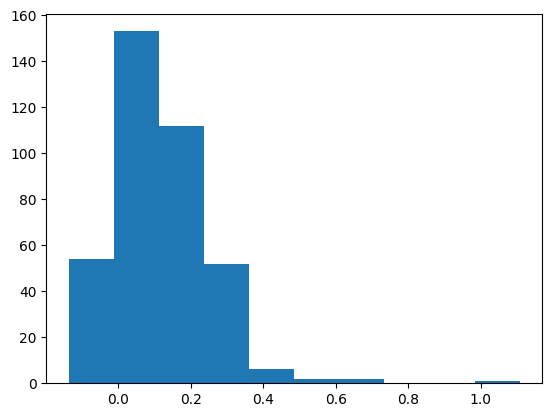

In [ ]:
plt.hist(df_final['Log(M/Ms)'])

(array([343.,  34.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.73088323,  1.93702893,  3.14317462,  4.34932032,  5.55546601,
         6.76161171,  7.9677574 ,  9.1739031 , 10.38004879, 11.58619449,
        12.79234018]),
 <BarContainer object of 10 artists>)

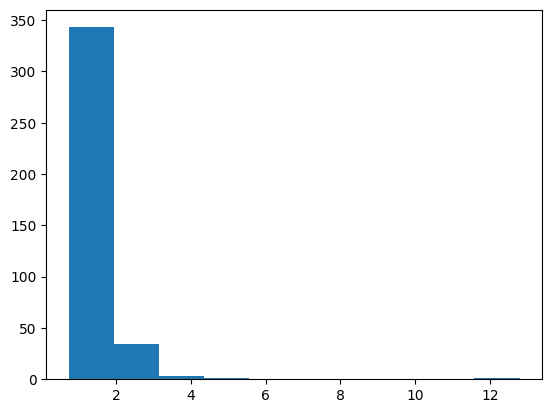

In [ ]:
plt.hist(df_final['M/Ms'])

## Mass_Age relation

$ Log(t) = a \times Log(M/M_s) + b $

In [ ]:
Mass_Age = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Age_relation_data.csv', encoding= 'unicode_escape')
Mass_Age = Mass_Age[Mass_Age['Z'] == Z]

In [ ]:
Mass_Age

,Z,a,b,M validity range (lower limit),M validity range (upper limit)
24,0.01,-3.256,9.993,NaN,0.179
25,0.01,-2.482,9.852,0.179,0.403
26,0.01,-2.865,10.007,0.403,0.626
27,0.01,-2.272,9.635,0.626,0.850
28,0.01,-1.852,9.278,0.850,1.073
29,0.01,-1.531,8.740,1.073,1.297
30,0.01,-0.955,8.227,1.297,1.520
31,0.01,-0.819,8.020,1.520,NaN


In [ ]:
def Mass_Age_a_b_Calculator(Relation_DataFrame, M_selected):
  if M_selected <= Relation_DataFrame.iloc[0][-1] : 
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif M_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['M validity range (upper limit)'] < M_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['b'])
  return a , b

In [ ]:
a , b = Mass_Age_a_b_Calculator(Mass_Age, df_final.loc[df_final.index[10],'Log(M/Ms)'])
print(f'a: {a}   b: {b}')

a: -2.482   b: 9.852


In [ ]:
round(df_final.loc[288,'Log(M/Ms)'],3)

0.021

In [ ]:
df_final['Log(t)'] = np.nan
df_final['t'] = np.nan
for i in df_final.index :
  a , b = Mass_Age_a_b_Calculator(Mass_Age, round(df_final.loc[i,'Log(M/Ms)'],3))
  df_final.loc[i,'Log(t)'] = a * (df_final.loc[i,'Log(M/Ms)']) +  b
  df_final.loc[i,'t'] = pow( 10 , df_final.loc[i,'Log(t)'] )

In [ ]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks,Log(M/Ms),M/Ms,Log(t),t
Mid,,,,,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200,0.041480,1.100221,9.857941,7.210097e+09
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120,0.039920,1.096276,9.863020,7.294919e+09
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200,0.029000,1.069055,9.898576,7.917280e+09
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110,0.036800,1.088429,9.873179,7.467568e+09
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340,-0.037880,0.916474,10.116337,1.307186e+10
...,...,...,...,...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068,-0.096312,0.801102,10.306592,2.025778e+10
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052,-0.122540,0.754154,10.391990,2.465984e+10
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108,-0.136152,0.730883,10.436311,2.730932e+10


(array([  1.,   0.,   0.,   4.,   2.,  21.,  94.,  97., 123.,  40.]),
 array([ 7.04525955,  7.38436469,  7.72346982,  8.06257496,  8.40168009,
         8.74078523,  9.07989037,  9.4189955 ,  9.75810064, 10.09720578,
        10.43631091]),
 <BarContainer object of 10 artists>)

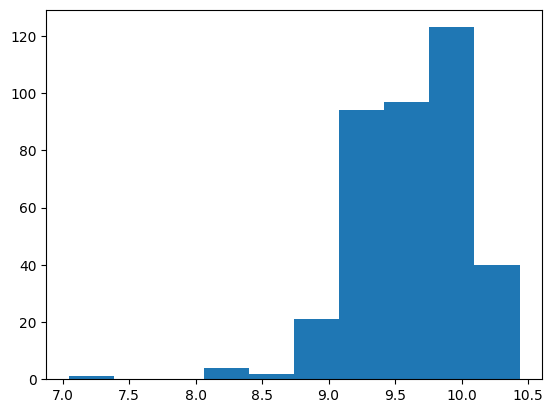

In [ ]:
plt.hist(df_final['Log(t)'])

(array([124.,  84.,  89.,  33.,  19.,   9.,   4.,   8.,   7.,   5.]),
 array([1.10983790e+07, 2.74092070e+09, 5.47074303e+09, 8.20056535e+09,
        1.09303877e+10, 1.36602100e+10, 1.63900323e+10, 1.91198546e+10,
        2.18496770e+10, 2.45794993e+10, 2.73093216e+10]),
 <BarContainer object of 10 artists>)

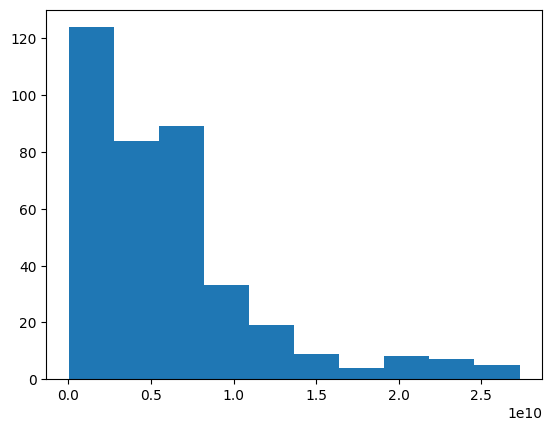

In [ ]:
plt.hist(df_final['t'])

## Mass_Pulsation relation

In [ ]:
Mass_Pulsation = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Pulsation_relation_data.csv', encoding= 'unicode_escape')
Mass_Pulsation = Mass_Pulsation[Mass_Pulsation['Z'] == Z]

In [ ]:
Mass_Pulsation

,Z,I,a,b,c,D
52,0.01,1,3.056,1.062,0.209,-8.225
53,0.01,2,0.697,0.711,0.095,0.000
54,0.01,3,6.275,1.444,0.333,0.000
55,0.01,4,5.593,0.385,0.598,0.000


In [ ]:
def Mass_Pulsation_a_b_c_D_Calculator(Relation_DataFrame, i ):
  a = Relation_DataFrame.iloc[i-1]['a']
  b = Relation_DataFrame.iloc[i-1]['b']
  c = Relation_DataFrame.iloc[i-1]['c']
  D = Relation_DataFrame.iloc[0]['D']
  return a , b , c , D 

In [ ]:
a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation,2)
print(f'a: {a}   b: {b}  c: {c}  D: {D}')

a: 0.697   b: 0.711  c: 0.095  D: -8.225


$ Log(δt) = Log(t) + D + Σ_1^4 a_i exp[-(Log(M/M_s) - b_i)^2 / c_i^2]$

In [ ]:
df_final['Log(dt)'] = np.nan
df_final['dt'] = np.nan
for i in df_final.index :
  log_dt = []
  log_t = df_final.loc[i,'Log(t)']
  log_M_Ms = df_final.loc[i,'Log(M/Ms)']
  for j in range(1,5):
    a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation, j )
    s = a * np.exp(-((log_M_Ms-b)**2)/(c**2))
    log_dt.append(s)
  
  df_final.loc[i,'Log(dt)'] = log_t + D + np.sum(log_dt)
  df_final.loc[i,'dt'] = pow( 10 , df_final.loc[i,'Log(dt)'] )

In [ ]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
Mid,,,,,,,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200,0.041480,1.100221,9.857941,7.210097e+09,5.653919,450732.759386
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120,0.039920,1.096276,9.863020,7.294919e+09,5.646938,443545.198419
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200,0.029000,1.069055,9.898576,7.917280e+09,5.597580,395895.282347
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110,0.036800,1.088429,9.873179,7.467568e+09,5.632921,429458.406004
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340,-0.037880,0.916474,10.116337,1.307186e+10,5.283421,192053.151238
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068,-0.096312,0.801102,10.306592,2.025778e+10,5.007781,101807.693227
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052,-0.122540,0.754154,10.391990,2.465984e+10,4.888467,77351.227365
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108,-0.136152,0.730883,10.436311,2.730932e+10,4.828283,67341.607018


(array([15., 11., 15., 23., 34., 54., 53., 33., 51., 93.]),
 array([4.82828348, 4.98183848, 5.13539349, 5.2889485 , 5.4425035 ,
        5.59605851, 5.74961352, 5.90316853, 6.05672353, 6.21027854,
        6.36383355]),
 <BarContainer object of 10 artists>)

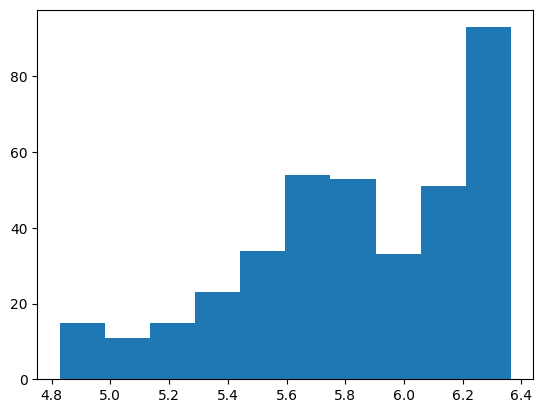

In [ ]:
plt.hist(df_final['Log(dt)'])

(array([68., 67., 62., 23., 24., 26., 19., 20., 23., 50.]),
 array([  67341.60701799,  291725.3272081 ,  516109.04739821,
         740492.76758832,  964876.48777843, 1189260.20796854,
        1413643.92815865, 1638027.64834876, 1862411.36853887,
        2086795.08872898, 2311178.80891909]),
 <BarContainer object of 10 artists>)

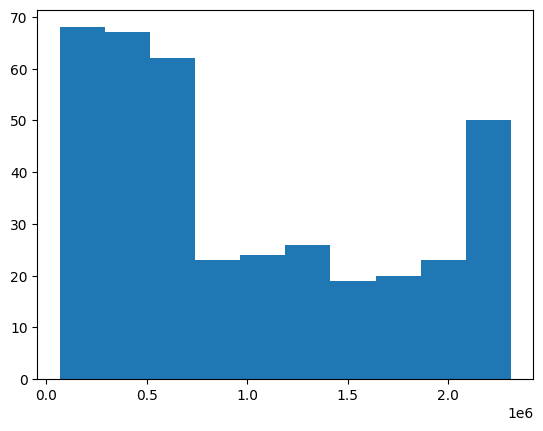

In [ ]:
plt.hist(df_final['dt'])

## Data Saving

In [ ]:
df_final.to_csv('NGC6822_LPV_Data_'+ Z_name +'.csv', index=False)

#Star Formation History

In [ ]:
df_final = df_final.sort_values(by='t', ascending=False)
df_final = df_final.reset_index()

In [ ]:
df_final

,Mid,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
0,380,89.99,297.181274,-14.445981,18.330,17.22200,C,1.108,-0.136152,0.730883,10.436311,2.730932e+10,4.828283,67341.607018
1,150,89.99,296.204498,-14.674287,18.120,17.21000,C,0.910,-0.134160,0.734243,10.429825,2.690450e+10,4.837007,68707.920751
2,191,89.99,296.333038,-14.770712,18.040,17.18000,C,0.860,-0.129180,0.742711,10.413610,2.591851e+10,4.858944,72267.610348
3,175,89.99,295.776978,-15.241439,18.040,17.18000,C,0.860,-0.129180,0.742711,10.413610,2.591851e+10,4.858944,72267.610348
4,379,89.99,296.003693,-14.974893,18.192,17.14000,C,1.052,-0.122540,0.754154,10.391990,2.465984e+10,4.888467,77351.227365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,83,30268.00,296.258910,-14.887960,16.530,14.26715,LPV,1.698,0.592501,3.912916,8.309486,2.039322e+08,5.218835,165514.230492
378,285,89.99,296.365631,-14.891643,15.362,14.24800,C,1.114,0.598418,3.966596,8.292532,1.961248e+08,5.195033,156687.045301
379,42,10198.00,296.250880,-14.767860,15.300,14.12000,O,1.180,0.637970,4.344802,8.185532,1.532965e+08,5.090837,123264.346881
380,44,10091.00,296.267020,-14.763110,15.260,14.11000,O,1.150,0.641060,4.375826,8.178512,1.508383e+08,5.086548,122052.873694


In [ ]:
df_final['alpha'] = np.nan
for i in df_final.index:
  if df_final.loc[i,'M/Ms'] < 0.08 :
     df_final.loc[i,'alpha'] = 0.3
  elif df_final.loc[i,'M/Ms'] >= 0.5 :
     df_final.loc[i,'alpha'] = 2.3
  else :
     df_final.loc[i,'alpha'] = 1.3  

(array([  0.,   0.,   0.,   0.,   0., 382.,   0.,   0.,   0.,   0.]),
 array([1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8]),
 <BarContainer object of 10 artists>)

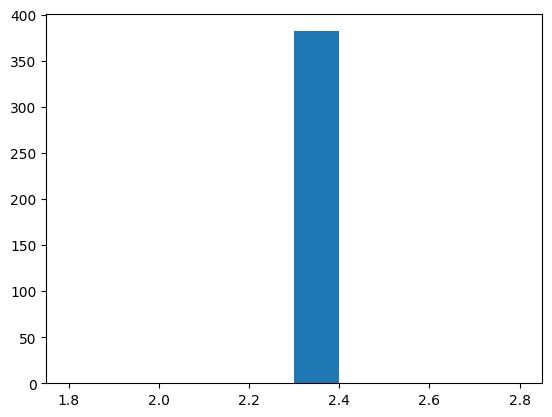

In [ ]:
plt.hist(df_final['alpha'])

In [ ]:
bins_number = 20
bins_with_more_stars = 2
bins_pop = ([19]*(bins_number-bins_with_more_stars)) + ([20]*bins_with_more_stars)

In [ ]:
lower_index = 0
sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                  + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                    + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

log_t = []
log_t_err = []

XI = []
XI_err = []

alpha =[]
M_lower_limit = []
M_upper_limit = []
log_t_lower_limit = []
log_t_upper_limit = []

for i in bins_pop :

  selected_df = df_final[lower_index:lower_index+i]

  # Calculating limitation of each bin 
  M_lower_limit_ = selected_df.iloc[0]['M/Ms']
  M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
  alpha_ = selected_df.iloc[0]['alpha']
  log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
  log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

  # Adding to lists
  alpha.append(alpha_)
  M_lower_limit.append(M_lower_limit_)
  M_upper_limit.append(M_upper_limit_)
  log_t_lower_limit.append(log_t_lower_limit_)
  log_t_upper_limit.append(log_t_upper_limit_)

  # Calculating XI
  p1 = sum(1/selected_df['dt'])
  p2 = sub_integration
  p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)
  
  XI_ = p1 * p2 * (1/p3)
  XI_err_ = XI_ * ((i**0.5)/i) 

  log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
  log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
  XI.append(XI_)
  XI_err.append(XI_err_)

  lower_index += i

In [ ]:
columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
           'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
           'Mean log(t) error' , 'XI' , 'XI error'] 
# Calling DataFrame constructor after zipping
# both lists, with columns specified
SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                               M_lower_limit,M_upper_limit,alpha,log_t,
                               log_t_err,XI,XI_err)), columns =columns)

In [ ]:
SFH_df

,log(t) (lower limit),log(t) (upper limit),M (lower limit),M (upper limit),Alpha,Mean log(t),Mean log(t) error,XI,XI error
0,10.294701,10.436311,0.730883,0.807867,2.3,10.365506,0.070805,0.006429,0.001475
1,10.110932,10.289296,0.810961,0.919983,2.3,10.200114,0.089182,0.003329,0.000764
2,10.013643,10.109311,0.921039,0.985508,2.3,10.061477,0.047834,0.004639,0.001064
3,9.948784,10.013643,0.985508,1.031763,2.3,9.981213,0.032430,0.005670,0.001301
4,9.898576,9.948784,1.031763,1.069055,2.3,9.923680,0.025104,0.006260,0.001436
5,9.852862,9.897560,1.069823,1.104180,2.3,9.875211,0.022349,0.006232,0.001430
6,9.809491,9.852862,1.104180,1.138571,2.3,9.831176,0.021685,0.005955,0.001366
7,9.776163,9.806640,1.140870,1.165725,2.3,9.791402,0.015238,0.007818,0.001794
8,9.744671,9.774640,1.166982,1.191977,2.3,9.759656,0.014984,0.007431,0.001705
9,9.698687,9.744671,1.191977,1.231377,2.3,9.721679,0.022992,0.004451,0.001021


<ipython-input-75-21381d7f857d>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")


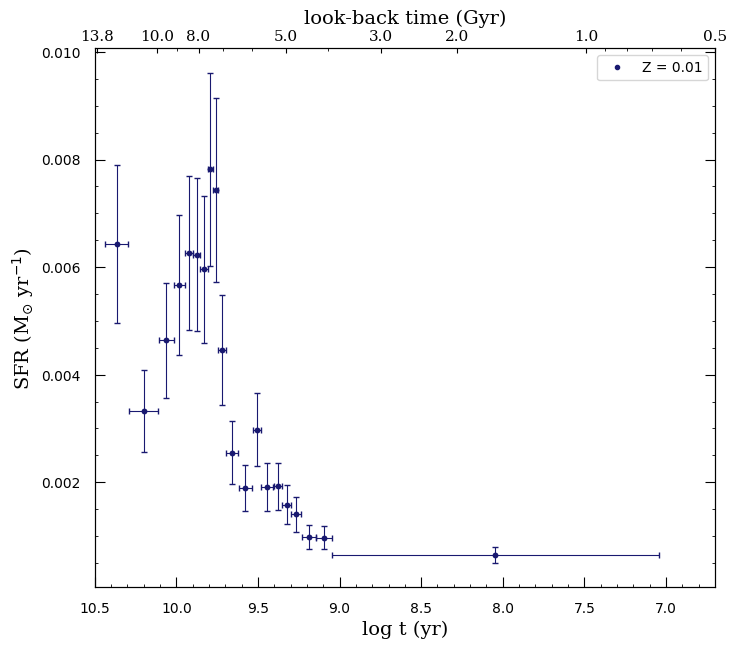

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')

plt.minorticks_on()

plt.xlim(10.5,6.7)

plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue', label = 'Z = ' + str(Z))
plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
             SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)

plt.legend()

###########################################
ax2 = plt.twiny()

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlim(13.96,0.575)

ax2.set_xscale('log')

ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xticks((13.8,10,8,5,3,2,1,0.5))
ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.3f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
###########################################


# plt.title('Field 1 - Without Using Probability Function', fontsize = 13)
plt.savefig('SFR-'+Z_name+'.jpeg', bbox_inches='tight', dpi = 400)

Saving Data 

In [ ]:
SFH_df.to_csv('NGC6822_SFH_Data_'+ Z_name +'.csv', index=False)